In [14]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [15]:
# Import the dataset
data = pd.read_csv("airbnb_chicago.csv",parse_dates=['last_review']).dropna().reset_index(drop=True)
print("Shape of dataframe:",data.shape) # Shape(8528,16)
print(data.isnull().sum())
# Get today's date
today_date = pd.to_datetime('today').date()
data['Today_date'] = pd.to_datetime(today_date)

Shape of dataframe: (6864, 16)
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64


In [31]:
print(data.eq(0).any())

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                   True
number_of_reviews_ltm              True
Today_date                        False
days_since_last_review            False
dtype: bool


In [16]:
data['days_since_last_review'] = data['Today_date'] - data['last_review']
data['days_since_last_review'] = data['days_since_last_review'].astype('str')
data['days_since_last_review'] = data['days_since_last_review'].str.extract('(\d+)').astype('int64')

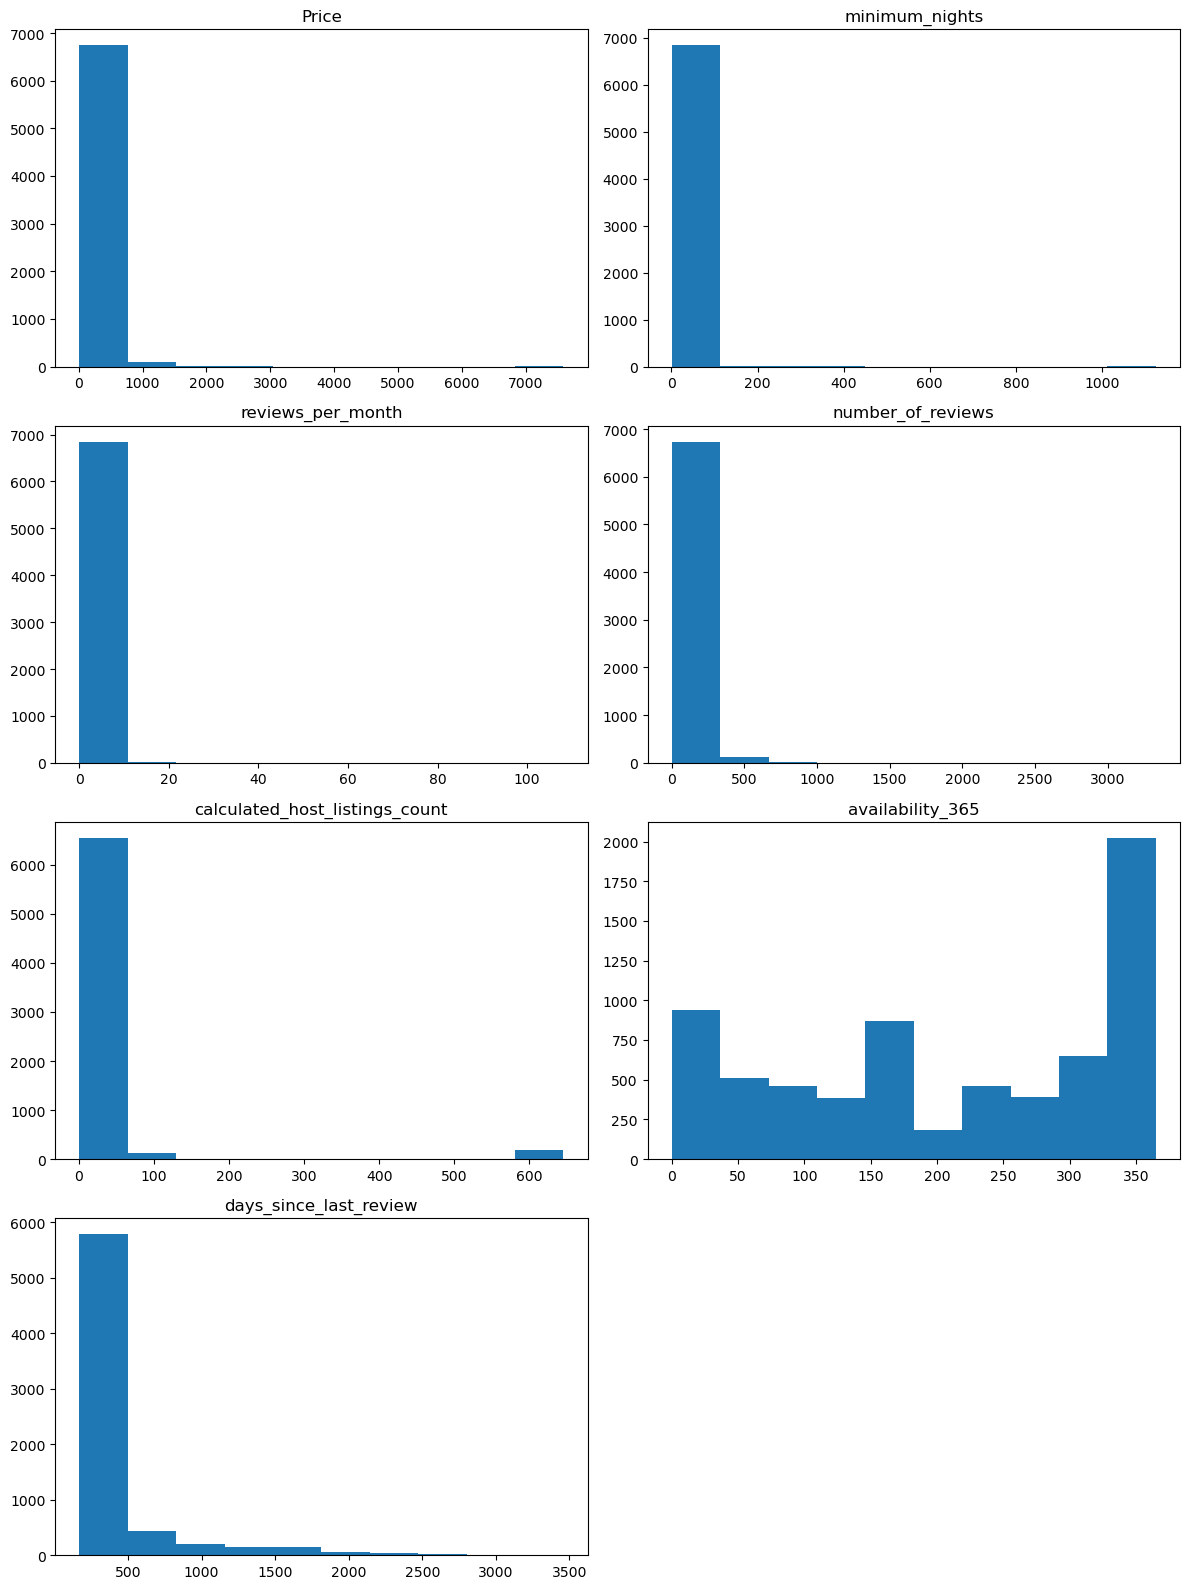

In [17]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

axs[0, 0].hist(data['price'])
axs[0, 0].set_title("Price")

axs[0, 1].hist(data['minimum_nights'])
axs[0, 1].set_title("minimum_nights")

axs[1, 0].hist(data['reviews_per_month'])
axs[1, 0].set_title("reviews_per_month")

axs[1, 1].hist(data['number_of_reviews'])
axs[1, 1].set_title("number_of_reviews")

axs[2, 0].hist(data['calculated_host_listings_count'])
axs[2, 0].set_title("calculated_host_listings_count")

axs[2, 1].hist(data['availability_365'])
axs[2, 1].set_title("availability_365")

# Add the seventh subplot
axs[3, 0].hist(data['days_since_last_review'])
axs[3, 0].set_title("days_since_last_review")

# Hide the empty subplot in the last row and second column
axs[3, 1].axis('off')

plt.tight_layout()
plt.show()

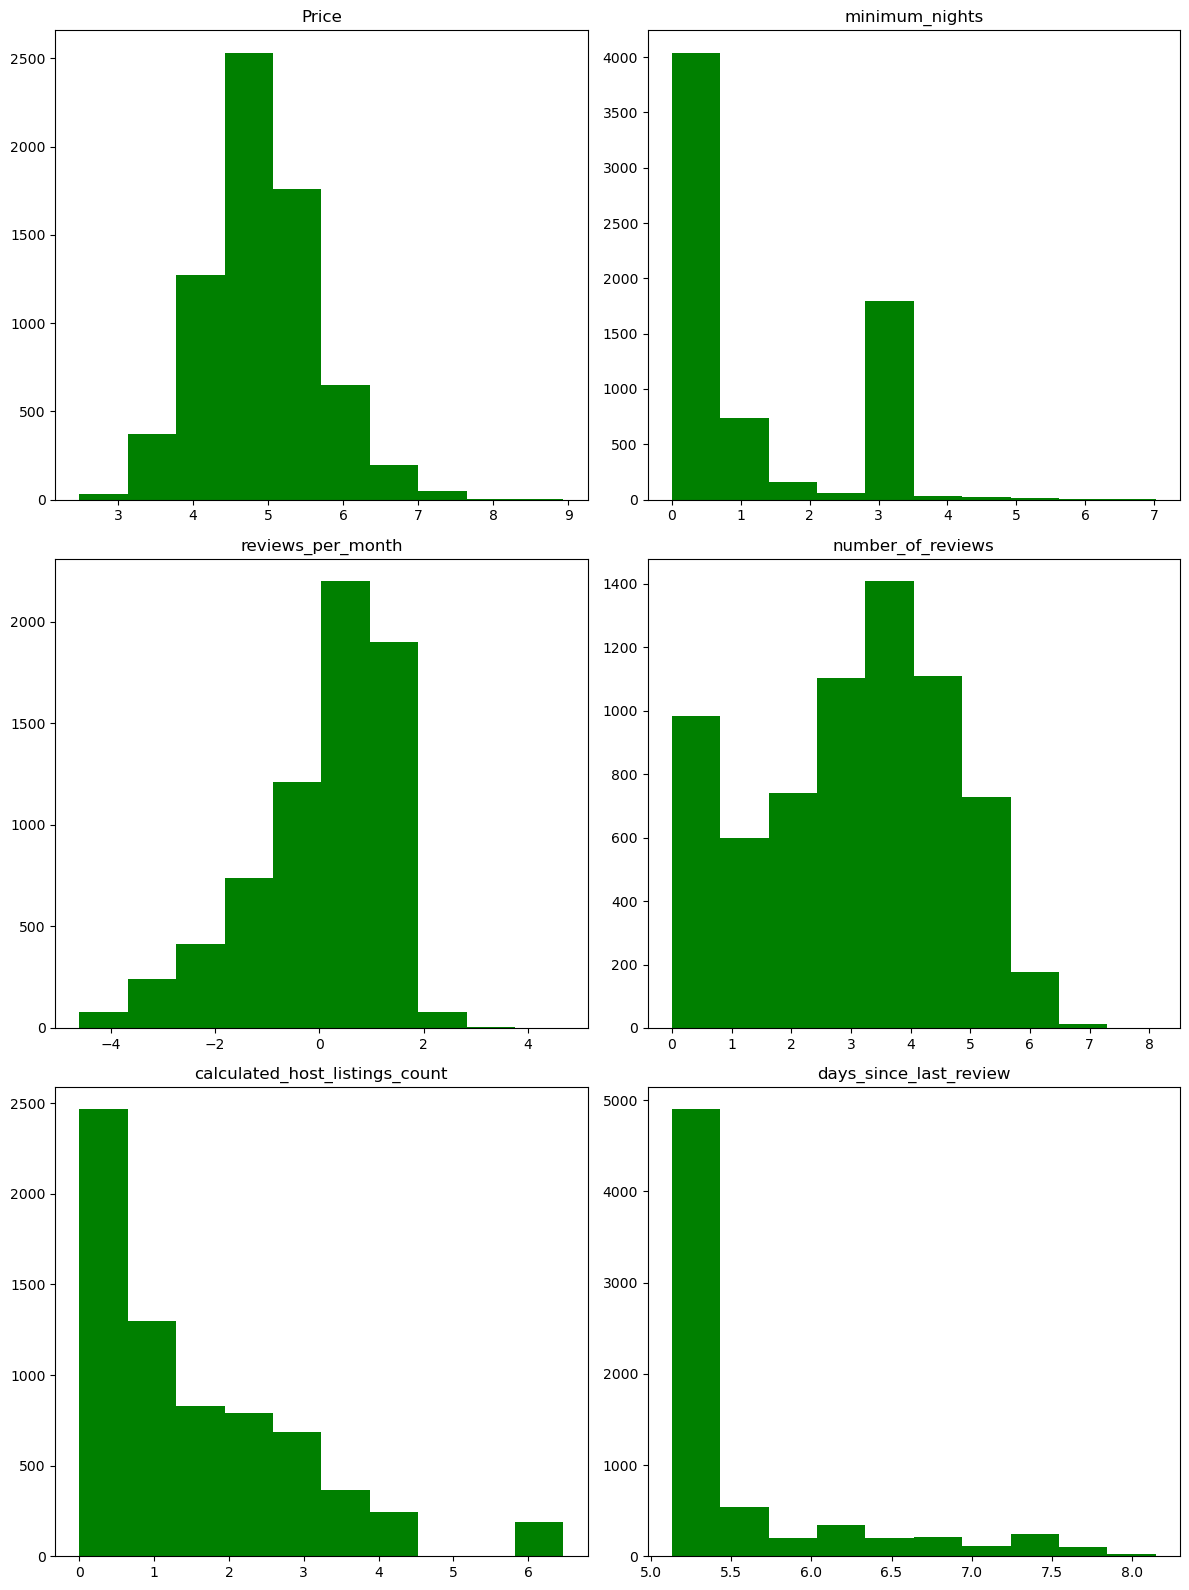

In [29]:
# The numerical columns are right-skewed in nature. Hence, we need to apply log-transformation to it
log_data = data.copy(deep=True)
log_data = np.log(log_data[['price','minimum_nights','reviews_per_month','number_of_reviews','calculated_host_listings_count','days_since_last_review']])

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

axs[0, 0].hist(log_data['price'],color='green')
axs[0, 0].set_title("Price")

axs[0, 1].hist(log_data['minimum_nights'],color='green')
axs[0, 1].set_title("minimum_nights")

axs[1, 0].hist(log_data['reviews_per_month'],color='green')
axs[1, 0].set_title("reviews_per_month")

axs[1, 1].hist(log_data['number_of_reviews'],color='green')
axs[1, 1].set_title("number_of_reviews")

axs[2, 0].hist(log_data['calculated_host_listings_count'],color='green')
axs[2, 0].set_title("calculated_host_listings_count")

axs[2, 1].hist(log_data['days_since_last_review'],color='green')
axs[2, 1].set_title("days_since_last_review")

#axs[3, 0].hist(log_data['availability_365'],color='green')
#axs[3, 0].set_title("availability_365")


plt.tight_layout()
plt.show()

In [30]:
log_data['availability_365'] = data['availability_365']
X = log_data[["minimum_nights","reviews_per_month","number_of_reviews","calculated_host_listings_count","availability_365","days_since_last_review"]]
y = log_data["price"]
model_linreg = LinearRegression()
model_linreg.fit(X,y)
print(model_linreg.coef_)
print(model_linreg.intercept_)

[-0.06616677 -0.00051565 -0.01120552 -0.01276225  0.00066428  0.02078446]
4.8005799366361455


In [25]:
# MSE for iteration - I
# Make predictions on the data
y_pred_model1 = model_linreg.predict(X)
# Calculate MSE for model1
mse_model1 = mean_squared_error(y,y_pred_model1)

print("Model 1 result:",mse_model1)


Model 1 result: 0.5299440179854745


In [10]:
# Creation of dummy variables for columns "room_type" and "neighhourhood"
cat_df = data[['room_type','neighbourhood']]
dummy_data = pd.get_dummies(cat_df, columns=['room_type','neighbourhood'],drop_first=True)
final_df = pd.concat([dummy_data,log_data],axis=1)
y = final_df['price']
final_df.drop('price',axis=1,inplace=True)

In [ ]:
# Setting yp the model
X = final_df
model_linreg = LinearRegression()


model_linreg.fit(X,y)
print(model_linreg.coef_)
print(model_linreg.intercept_)

In [12]:
# MSE for iteration - II
# Make predictions on the data
y_pred_model2 = model_linreg.predict(X)
# Calculate MSE for model2
mse_model2 = mean_squared_error(y,y_pred_model2)
print("Model 2 result:",mse_model2)

Model 2 result: 0.3188409261623892


In [13]:
print(data[['id','host_id']].describe())
print("Unique values in id column:",data["id"].nunique())
print("Unique values in host_id column:",data["host_id"].nunique())

                 id       host_id
count  6.864000e+03  6.864000e+03
mean   3.104832e+17  1.699308e+08
std    3.814883e+17  1.634670e+08
min    2.384000e+03  2.153000e+03
25%    3.022771e+07  2.974406e+07
50%    5.012044e+07  1.074344e+08
75%    7.146783e+17  2.768643e+08
max    9.730151e+17  5.325715e+08
Unique values in id column: 6864
Unique values in host_id column: 3439
